In [205]:
import matplotlib
import tensorflow as tf
import tensorflow_datasets as tfds
import random
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import *

In [206]:
matplotlib.rcParams['figure.figsize'] = [10, 7]
np.set_printoptions(precision=3, suppress=True)

# Hyperparameters
seed = 22
tf.random.set_seed(seed)
random.seed(a=seed)
hidden_neurons = 128
number_of_hidden_layers = 1
batch_size = 128
learning_rate = 0.001
max_epochs = 50
k = 10
val_split = 0.3
activation_func_first_layer = 'relu'

In [207]:
def plot_graph(dataset):
    plot_cols = ['New_cases', 'New_deaths']
    plot_features = dataset[plot_cols]
    plot_features.index = dataset['Date_reported']
    _ = plot_features.plot(subplots=True)
    plt.show()

In [208]:
# Collecting
covid = pd.read_csv("WHO-COVID-19-global-data.csv")

In [209]:
# Defining country and time span
country = 'Brazil'
train_start_date = '2022-01-01'
train_end_date = '2022-04-30'
test_start_date = '2022-05-01'
test_end_date = '2022-05-31'

In [210]:
# Selecting important data based on date and country and finishing cleaning up the data
train_df = covid.query('Date_reported >= @train_start_date and Date_reported <= @train_end_date and Country == @country')
test_df = covid.query('Date_reported >= @test_start_date and Date_reported <= @test_end_date and Country == @country')

In [211]:
# Pre-processing the data to eliminate unused columns
_ = train_df.pop('Country')
_ = train_df.pop('Cumulative_cases')
_ = train_df.pop('Cumulative_deaths')
_ = train_df.pop('Country_code')
_ = train_df.pop('WHO_region')
_ = test_df.pop('Country')
_ = test_df.pop('Cumulative_cases')
_ = test_df.pop('Cumulative_deaths')
_ = test_df.pop('Country_code')
_ = test_df.pop('WHO_region')

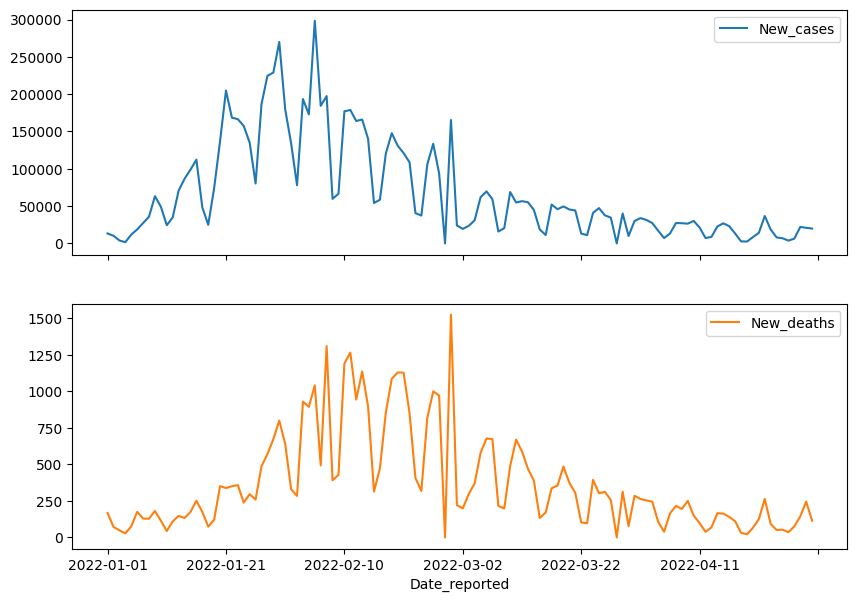

In [212]:
plot_graph(train_df)

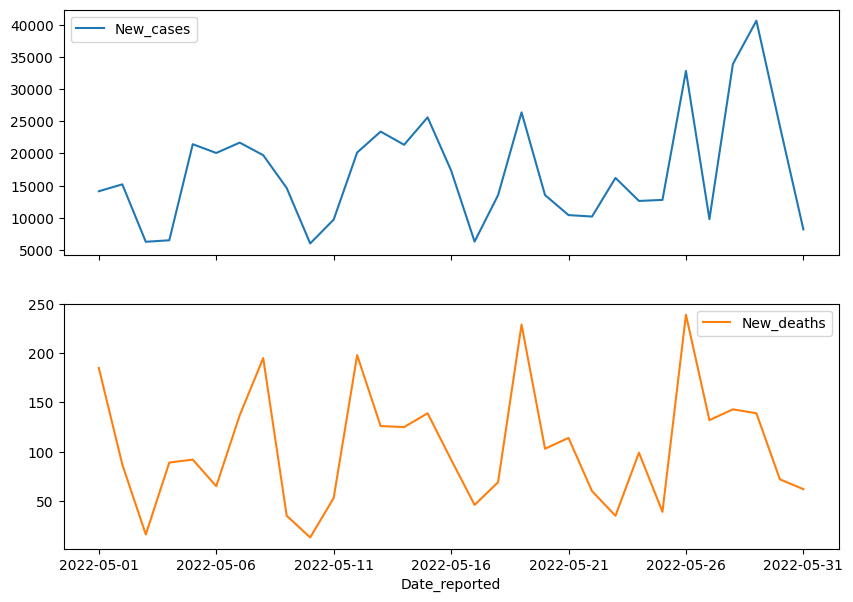

In [213]:
plot_graph(test_df)

In [214]:
# train_df['Date_reported'] = pd.to_datetime(train_df['Date_reported'])
# train_df['Date_reported'] = train_df['Date_reported'].dt.day
# test_df['Date_reported'] = pd.to_datetime(test_df['Date_reported'])
# test_df['Date_reported'] = test_df['Date_reported'].dt.day

In [215]:
date_time_train = pd.to_datetime(train_df.pop('Date_reported'), format='%Y.%m.%d')
date_time_test = pd.to_datetime(test_df.pop('Date_reported'), format='%Y.%m.%d')

data = train_df[['New_cases']].copy()
target = train_df[['New_deaths']].copy()
test = test_df[['New_cases']].copy()

data.insert(loc=0, column='Date_reported', value=date_time_train)
test.insert(loc=0, column='Date_reported', value=date_time_test)

data.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [216]:
train_mean = data['New_cases'].mean()
train_std = data['New_cases'].std()